# Oct ??th, 2022 (Linear: GLM -- hyperflow)

**Motivation**: <br>

In [1]:
# HIDE CODE


import os
import sys
from copy import deepcopy as dc
from os.path import join as pjoin
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-MTMST/_extras')
fig_base_dir = pjoin(git_dir, 'jb-MTMST/figs')
tmp_dir = pjoin(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_MTMST'))
from model.vae import ConfigVAE, VAE
from analysis.hyperflow import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
from model.dataset import setup_repeat_data, setup_supervised_data
from analysis.glm import *

cfg = ConfigVAE()
file = h5py.File(cfg.h_file, 'r')

## Loop

fitting clu267 . . .

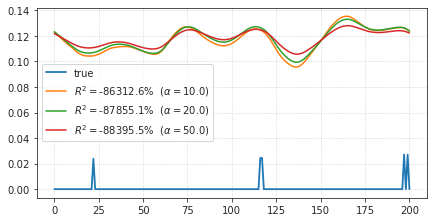

expt = clu267, i = 0 (useful: False), a = 10.0, nnll = 0.07796967025906962

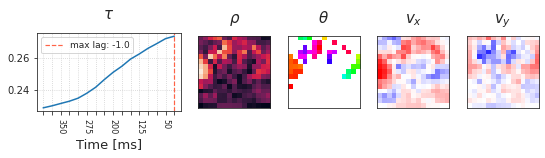

expt = clu267, i = 0 (useful: False), a = 20.0, nnll = 0.050022235037867

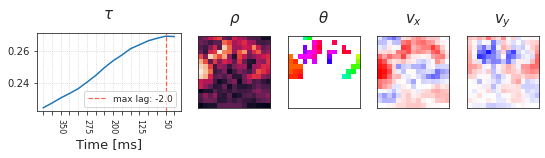

expt = clu267, i = 0 (useful: False), a = 50.0, nnll = 0.025083842694643633

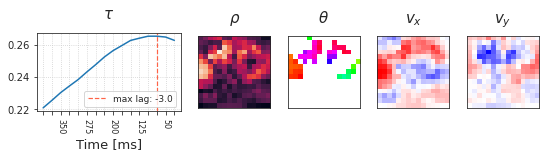

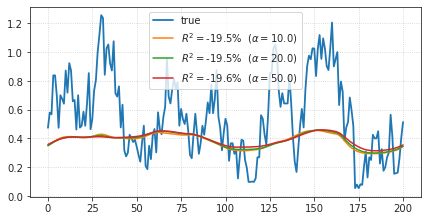

expt = clu267, i = 1 (useful: True), a = 10.0, nnll = 0.02931751825787483

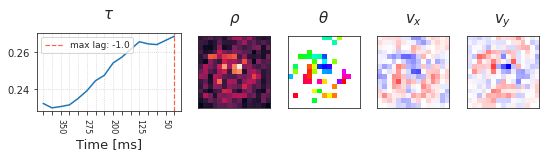

expt = clu267, i = 1 (useful: True), a = 20.0, nnll = 0.023831100187797417

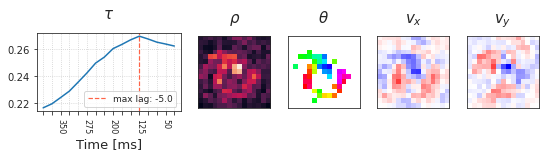

expt = clu267, i = 1 (useful: True), a = 50.0, nnll = 0.017300905570818426

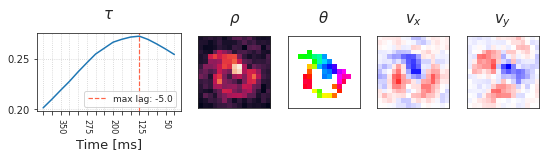

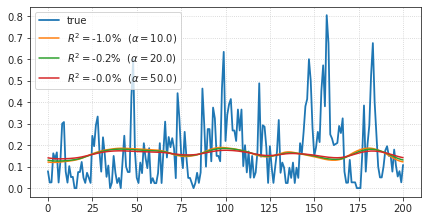

expt = clu267, i = 2 (useful: False), a = 10.0, nnll = 0.011257664814837209

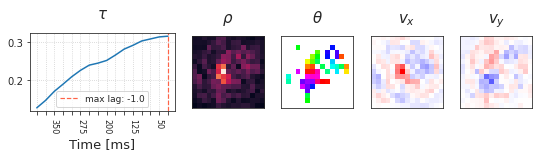

expt = clu267, i = 2 (useful: False), a = 20.0, nnll = 0.00876113514175838

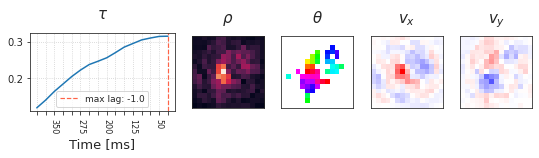

expt = clu267, i = 2 (useful: False), a = 50.0, nnll = 0.005205475486663058

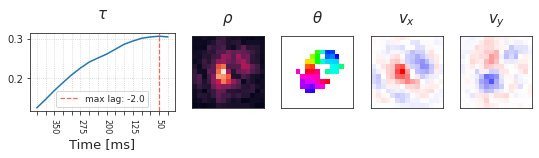

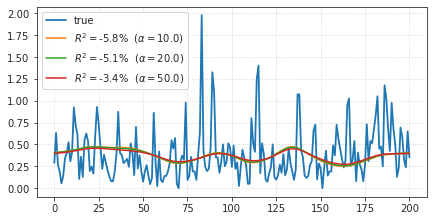

expt = clu267, i = 3 (useful: True), a = 10.0, nnll = 0.021944719823613523

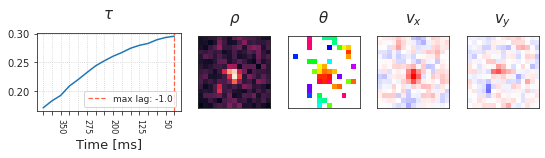

expt = clu267, i = 3 (useful: True), a = 20.0, nnll = 0.01975930835224595

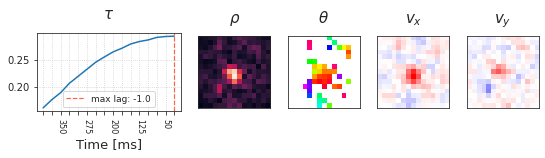

expt = clu267, i = 3 (useful: True), a = 50.0, nnll = 0.016589738835568246

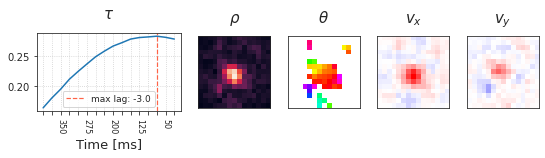

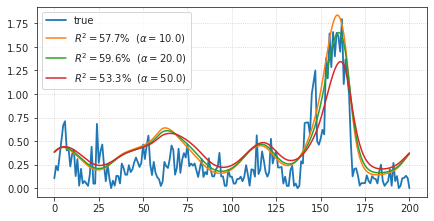

expt = clu267, i = 4 (useful: True), a = 10.0, nnll = 0.1364175894631486

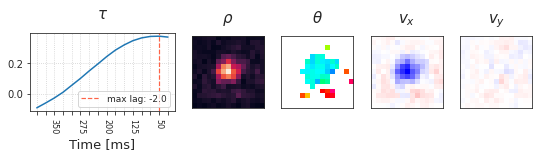

expt = clu267, i = 4 (useful: True), a = 20.0, nnll = 0.13025184027294365

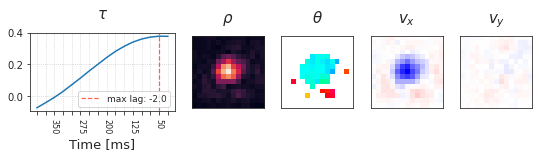

expt = clu267, i = 4 (useful: True), a = 50.0, nnll = 0.11597034331166789

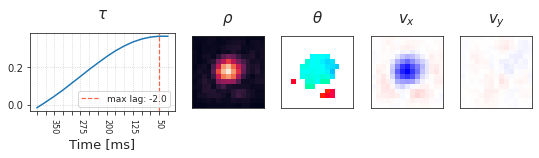

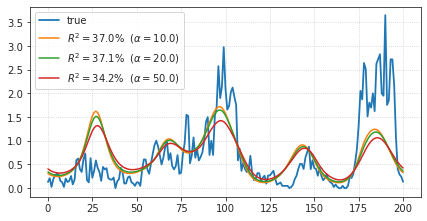

expt = clu267, i = 5 (useful: True), a = 10.0, nnll = 0.328814335820664

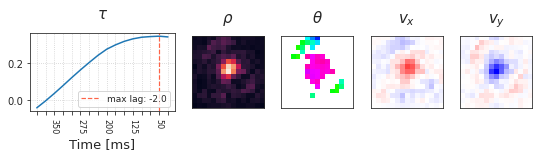

expt = clu267, i = 5 (useful: True), a = 20.0, nnll = 0.3157539128587678

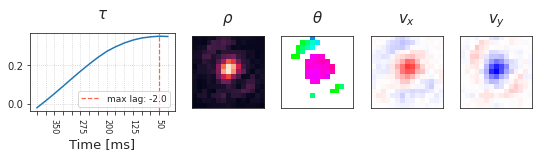

expt = clu267, i = 5 (useful: True), a = 50.0, nnll = 0.28696606167439626

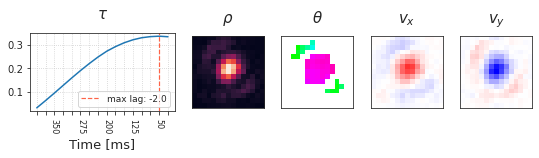

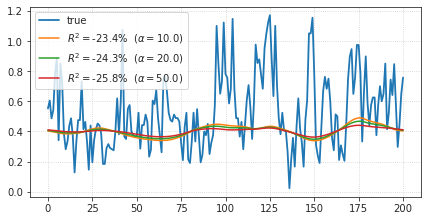

expt = clu267, i = 6 (useful: True), a = 10.0, nnll = 0.008514442687120694

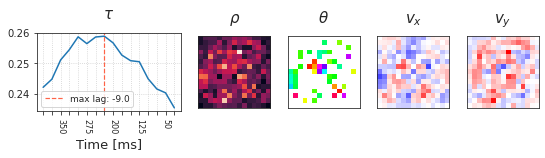

expt = clu267, i = 6 (useful: True), a = 20.0, nnll = 0.006585523643755087

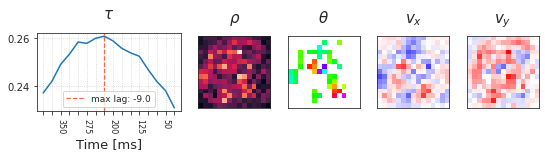

expt = clu267, i = 6 (useful: True), a = 50.0, nnll = 0.0044740888532628365

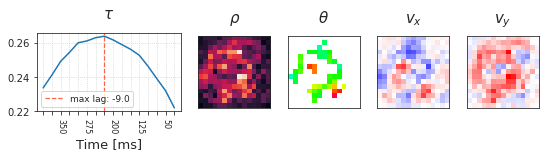

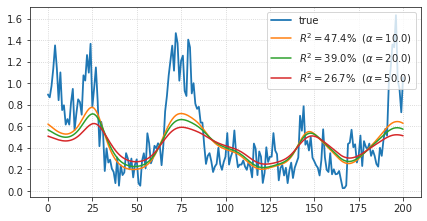

expt = clu267, i = 7 (useful: True), a = 10.0, nnll = 0.08075478850015476

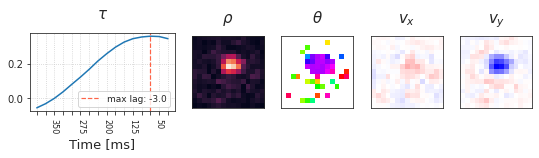

expt = clu267, i = 7 (useful: True), a = 20.0, nnll = 0.0743571634283248

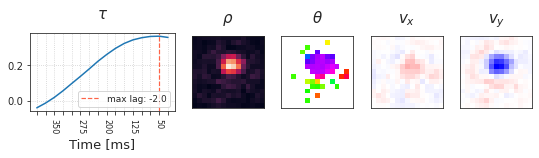

expt = clu267, i = 7 (useful: True), a = 50.0, nnll = 0.06223383254394386

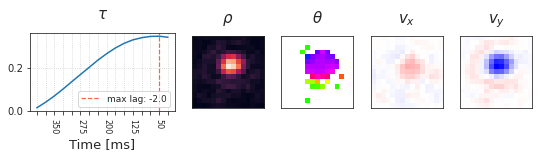

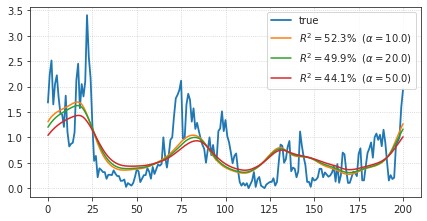

expt = clu267, i = 8 (useful: True), a = 10.0, nnll = 0.07209340943766458

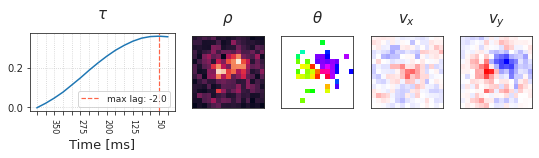

expt = clu267, i = 8 (useful: True), a = 20.0, nnll = 0.06732790143802467

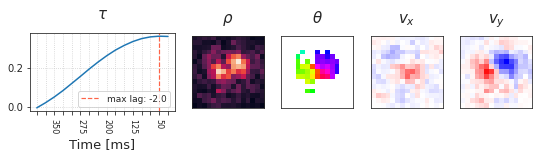

expt = clu267, i = 8 (useful: True), a = 50.0, nnll = 0.05937070031328804

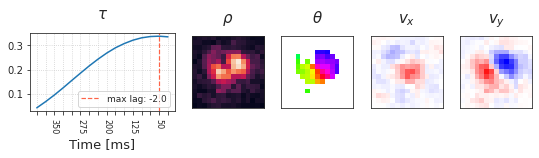

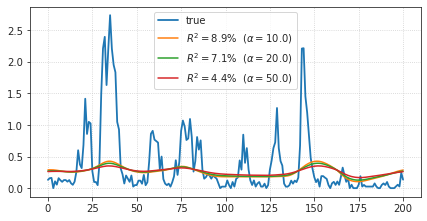

expt = clu267, i = 9 (useful: True), a = 10.0, nnll = 0.06297289868627391

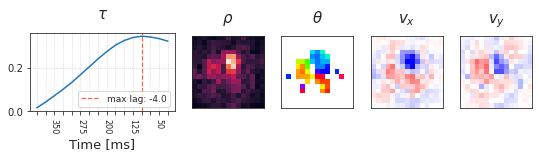

expt = clu267, i = 9 (useful: True), a = 20.0, nnll = 0.0540755581904647

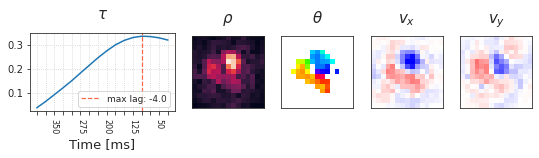

expt = clu267, i = 9 (useful: True), a = 50.0, nnll = 0.04020307012429809

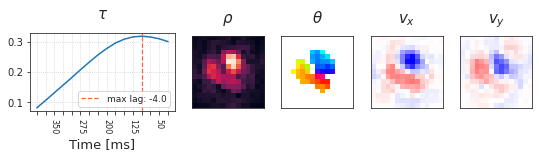

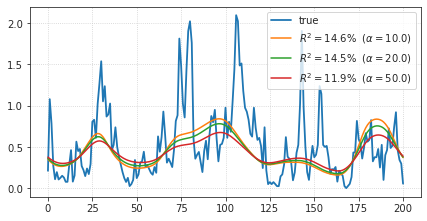

expt = clu267, i = 10 (useful: False), a = 10.0, nnll = 0.07480398689807091

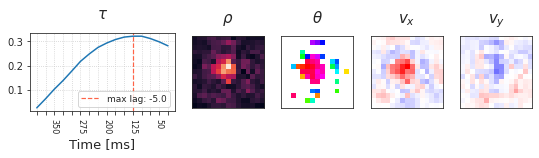

expt = clu267, i = 10 (useful: False), a = 20.0, nnll = 0.06799202202685253

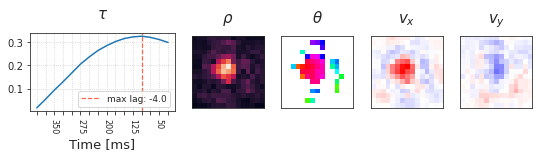

expt = clu267, i = 10 (useful: False), a = 50.0, nnll = 0.05702093142000235

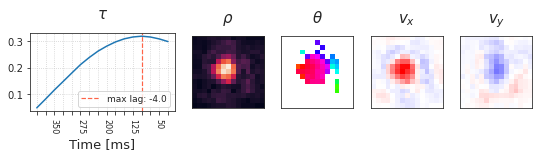

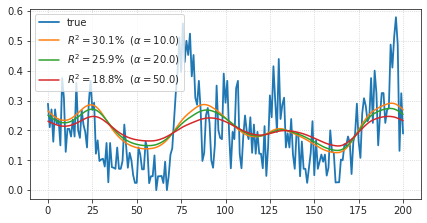

expt = clu267, i = 11 (useful: True), a = 10.0, nnll = 0.031259058551834064

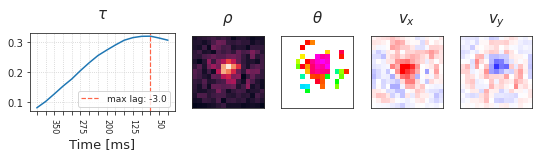

expt = clu267, i = 11 (useful: True), a = 20.0, nnll = 0.02661085986111873

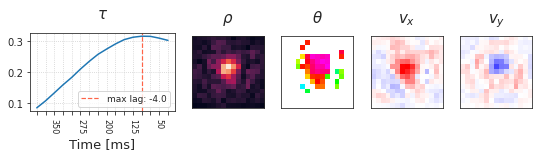

expt = clu267, i = 11 (useful: True), a = 50.0, nnll = 0.019724882329421066

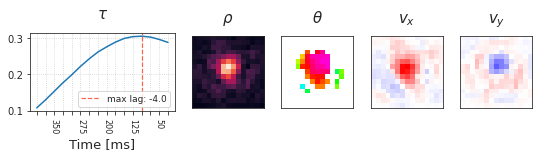

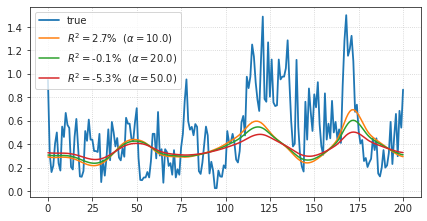

expt = clu267, i = 12 (useful: True), a = 10.0, nnll = 0.028893789401602542

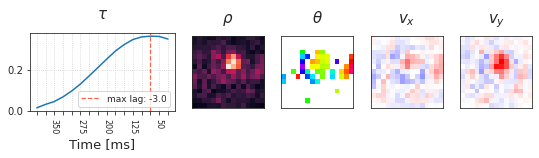

expt = clu267, i = 12 (useful: True), a = 20.0, nnll = 0.02459953534932686

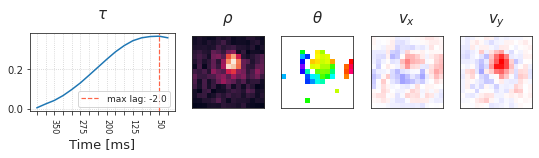

expt = clu267, i = 12 (useful: True), a = 50.0, nnll = 0.018418484088112485

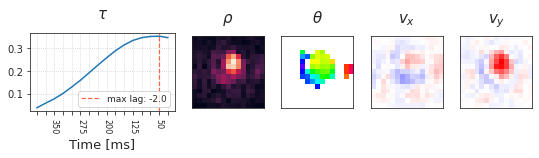

In [ ]:
%%time

df = []
lags = 16
for expt, grp in file.items():
    if expt != 'clu267':
        continue
    stim = np.array(grp['stim1'], dtype=float)
    spks = np.array(grp['spks'], dtype=float)
    good = ~np.array(grp['badspks'])
    good = np.where(good)[0]

    src, tgt = setup_supervised_data(lags, good, stim, spks)
    stim_r, spks_r = setup_repeat_data(grp, lags)
    
    print(f"fitting {expt} . . .")
    for i in range(tgt.shape[-1]):
        useful = i in cfg.useful_cells.get(expt, {})
        if 'repeats' in grp:
            glm = GLM(src, tgt[:, i], stim_r, np.nanmean(spks_r[i], 0))
        else:
            glm = GLM(src, tgt[:, i])
        glm.fit()
        nnll = glm.perf_df()
        nnll = nnll.groupby(['alpha']).mean()['nnll']
        nnll = dict(nnll)
        if glm.r2:
            r2 = {
                k: v if v > 0 else np.nan
                for k, v in glm.r2.items()
            }
        else:
            r2 = {
                a: np.nan for
                a in glm.alphas
            }
        df.append({
            'expt': [expt] * len(glm.alphas),
            'channel': [i] * len(glm.alphas),
            'useful': [useful] * len(glm.alphas),
            'alpha': glm.alphas,
            'nnll': nnll.values(),
            'r2': r2.values(),
        })
        _ = glm.show_pred()
        for a, k in glm.kers.items():
            msg = ', '.join([
                f"expt = {expt}",
                f"i = {i} (useful: {useful})",
                f"a = {a:0.1f}",
                f"nnll = {nnll[a]}",
            ])
            
            print(msg)
            k.show()
    print('_' * 70 + '\n' + '_' * 70)
    print('\n\n')

df = pd.DataFrame(merge_dicts(df))
print('Done.')
file.close()

In [ ]:
df

## Visualize performance

In [ ]:
df = pd.read_pickle(pjoin(cfg.results_dir, 'GLM', 'glm-(2022_10_16).df'))

In [ ]:
fig, axes = create_figure(1, 2, (8, 3))
sns.barplot(
    data=df,
    x='alpha',
    y='nnll',
    ax=axes[0],
)
sns.barplot(
    data=df,
    x='alpha',
    y='r2',
    ax=axes[1],
)
add_grid(axes)
plt.show()

In [ ]:
r2 = np.array(df['r2'])
ids = np.where((r2 > 50) & (r2 < 70))[0]
df.iloc[ids]

In [ ]:
idxs = []
for expt in df['expt'].unique():
    _df1 = df.loc[df['expt'] == expt]
    for i in _df1['channel'].unique():
        _df2 = _df1.loc[_df1['channel'] == i]
        idxs.append(_df2.index[_df2['nnll'].argmax()])
df_max = df.iloc[idxs]

In [ ]:
fig, axes = create_figure(1, 2, (8, 3))
sns.barplot(
    data=df_max,
    x='alpha',
    y='nnll',
    ax=axes[0],
)
sns.barplot(
    data=df_max,
    x='alpha',
    y='r2',
    ax=axes[1],
)
add_grid(axes)
plt.show()

In [ ]:
sns.histplot(
    data=df_max,
    x='nnll',
    hue='alpha',
    palette='muted',
);

In [ ]:
for i in range(len(df_max)):
    print(df_max.iloc[i].to_string(), '\n')

## Useful cells (have repeats + good response)

In [ ]:
cfg.useful_cells